## Conditional Spectrum (CS) Based Record Selection, IM = AvgSa(T*)

In [1]:
# !pip install EzGM
# If geos_c.dll or similar .dll files are missing, OpenQuake dependencies are not properly installed. 
# Write conda install shapely in anaconda prompt

In [2]:
from EzGM.Selection import conditional_spectrum
from time import time
from EzGM.Utility import RunTime
import numpy as np

In [3]:
# Acquire the run start time
startTime = time()

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [4]:
cs = conditional_spectrum(Tstar=np.arange(0.1, 1.1, 0.1), gmpe='AkkarEtAlRjb2014', database='NGA_W2', pInfo=1)

For the selected gmpe;
The mandatory input distance parameters are ['rjb']
The mandatory input rupture parameters are ['rake', 'mag']
The mandatory input site parameters are ['vs30']
The defined intensity measure component is Average horizontal
The defined tectonic region type is Active Shallow Crust



### 2) Create target spectrum

Target spectrum is created.


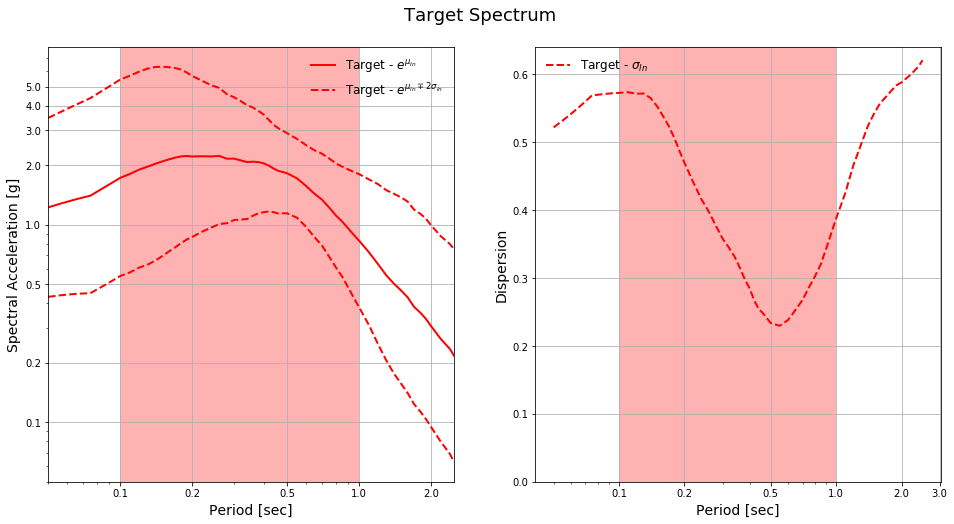

In [5]:
cs.create(site_param={'vs30': 500}, rup_param={'rake': 0.0, 'mag': [7.5]},
          dist_param={'rjb': [10]}, Hcont=None, T_Tgt_range=[0.05, 2.5],
          im_Tstar=1.5, epsilon=None, cond=1, useVar=1, corr_func='akkar',
          outdir='Outputs')
# Target spectrum can be plotted at this stage
cs.plot(tgt=1, sim=0, rec=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.05 - 2.50]
Max error in median = 9.28 %
Max error in standard deviation = 23.62 %


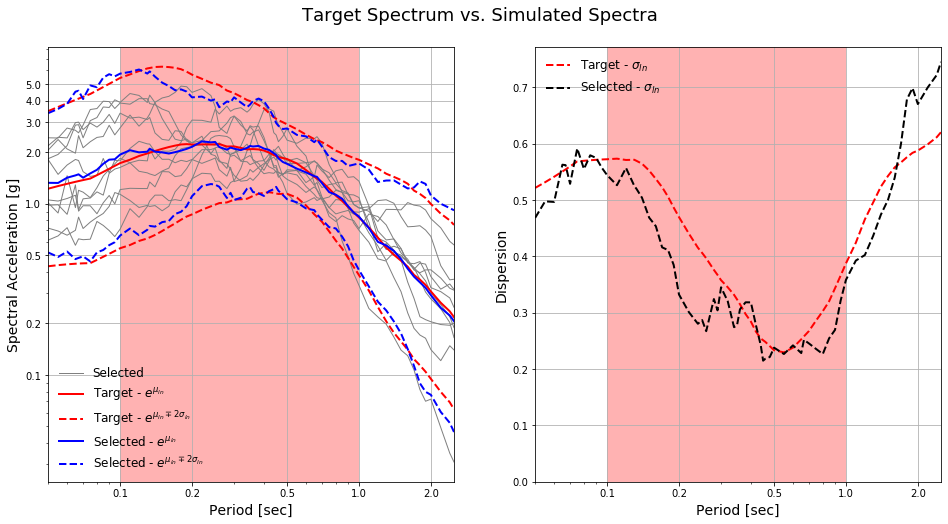

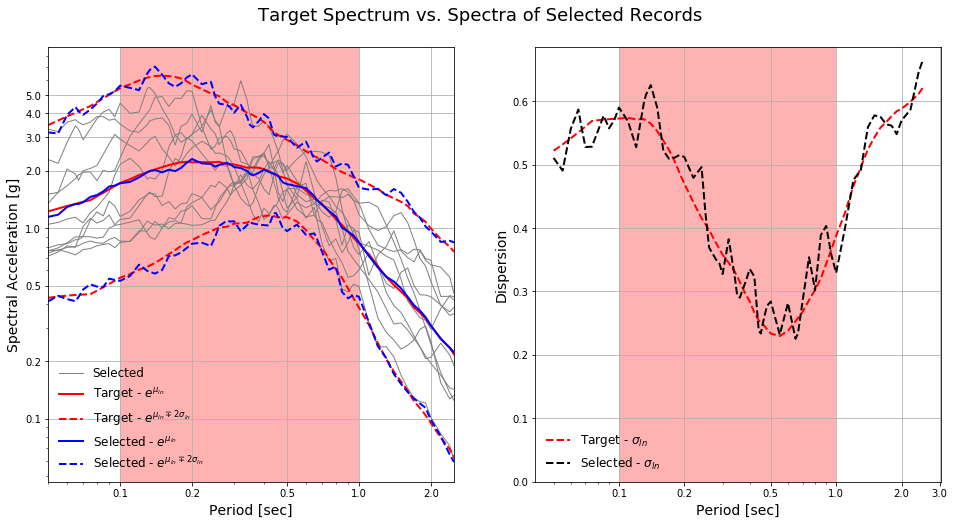

In [6]:
cs.select(nGM=10, selection=1, Sa_def='RotD50', isScaled=1, maxScale=4,
          Mw_lim=[5.5,8], Vs30_lim=[360,760], Rjb_lim=[0,50], fault_lim=None, nTrials=20,
          weights=[1, 2, 0.3], seedValue=0, nLoop=2, penalty=1, tol=10)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(tgt=0, sim=1, rec=1, save=1, show=1)

### 4) If database == 'NGA_W2' you can first download the records via nga_download method from NGA-West2 Database [http://ngawest2.berkeley.edu/] and then use write method. If you already have record database elsewhere you can ignore and comment this part

In [7]:
cs.ngaw2_download(username = 'example_username@email.com', pwd = 'example_password123456')


Started executing ngaw2_download method...
Downloaded chromedriver successfully!
Signing in with given account!...
Invalid email or password.
Invalid email or password.


ValueError: Invalid email or password.

### 5) If you have records already inside recs_f\database.zip\database or downloaded records for database = NGA_W2 case, write whatever you want, the object itself, selected and scaled time histories

In [8]:
cs.write(obj=1, recs=0, recs_f='')

Finished writing process, the files are located in
D:\GitHub\EzGM\Examples\Outputs


In [9]:
# Calculate the total time passed
RunTime(startTime)

Run time: 0 hours: 0 minutes: 34.89 seconds
